In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from sklearn.impute import SimpleImputer

#Load dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project1/_Fitness_new.csv")
df.head(5)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17.0,79.56,8,Wed,PM,Strength,0
1,2,10.0,79.01,2,Mon,AM,HIIT,0
2,3,16.0,74.53,14,Sun,AM,Strength,0
3,4,5.0,86.12,10,Fri,AM,Cycling,0
4,5,15.0,69.29,8,Thu,AM,HIIT,0


#EDA

In [4]:
df.shape

(1407, 8)

Removing 'Strings' at the end of the numbers in days_before column

In [5]:
# If it's not a float, convert it to string type
if df['days_before'].dtype != 'object':
    df['days_before'] = df['days_before'].astype(str)
df['days_before'] = df['days_before'].str.extract(r'(\d+)')
df['days_before'] = df['days_before'].fillna(0)  # filling with 0 temporarily
df['days_before'] = df['days_before'].astype('int64')

# '0' is null place in 'days_before' column

making all parameters in same size in days_of_week column

In [6]:
col_map1 = {'Wednesday':'Wed', 'Fri.':'Fri', 'Monday':'Mon'}
df['day_of_week'] = df['day_of_week'].replace(col_map1)
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

replacing NA strings with null values in weight column

In [7]:
col_map2 = {'NA': np.nan}
df['weight']=df['weight'].replace(col_map2)
df['weight'].unique()

array([79.56, 79.01, 74.53, ..., 87.38, 68.64, 94.39])

replacing - with null alues in category column

In [8]:
col_map3={'-': np.nan}
df['category']=df['category'].replace(col_map3)
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', nan, 'Yoga', 'Aqua'], dtype=object)

copying df inti dfc without disturbing original dataframe

In [9]:
dfc = df.copy()
dfc.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17.0,79.56,8,Wed,PM,Strength,0
1,2,10.0,79.01,2,Mon,AM,HIIT,0
2,3,16.0,74.53,14,Sun,AM,Strength,0
3,4,5.0,86.12,10,Fri,AM,Cycling,0
4,5,15.0,69.29,8,Thu,AM,HIIT,0
5,6,7.0,93.33,2,Mon,AM,Cycling,0
6,7,11.0,88.59,6,Wed,PM,HIIT,0
7,8,9.0,89.52,10,Fri,AM,HIIT,0
8,9,23.0,71.12,10,Fri,AM,HIIT,1
9,17,22.0,69.52,14,Sun,AM,NaN,1


In [10]:
dfc.describe()

,booking_id,months_as_member,weight,days_before,attended
count,1407.000000,1397.000000,1378.000000,1407.000000,1407.000000
mean,759.019190,15.745168,82.614049,8.276475,0.305615
std,432.119987,13.058807,12.839356,4.126507,0.460831
min,1.000000,1.000000,55.410000,0.000000,0.000000
25%,391.500000,8.000000,73.440000,4.000000,0.000000
50%,757.000000,12.000000,80.745000,8.000000,0.000000
75%,1126.500000,19.000000,89.520000,12.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,1.000000


In [11]:
dfc.sample()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1082,1154,5.0,107.55,6,Wed,AM,Aqua,0


In [12]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1407 non-null   int64  
 1   months_as_member  1397 non-null   float64
 2   weight            1378 non-null   float64
 3   days_before       1407 non-null   int64  
 4   day_of_week       1407 non-null   object 
 5   time              1404 non-null   object 
 6   category          1393 non-null   object 
 7   attended          1407 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 88.1+ KB


checking null values

In [13]:
dfc.isnull().sum()

booking_id           0
months_as_member    10
weight              29
days_before          0
day_of_week          0
time                 3
category            14
attended             0
dtype: int64

In [14]:
dfc.isnull().sum().sum()

56

finding missing percentage

In [15]:
missing_percentage = dfc.isnull().mean()*100
missing_percentage

booking_id          0.000000
months_as_member    0.710732
weight              2.061123
days_before         0.000000
day_of_week         0.000000
time                0.213220
category            0.995025
attended            0.000000
dtype: float64

<Axes: >

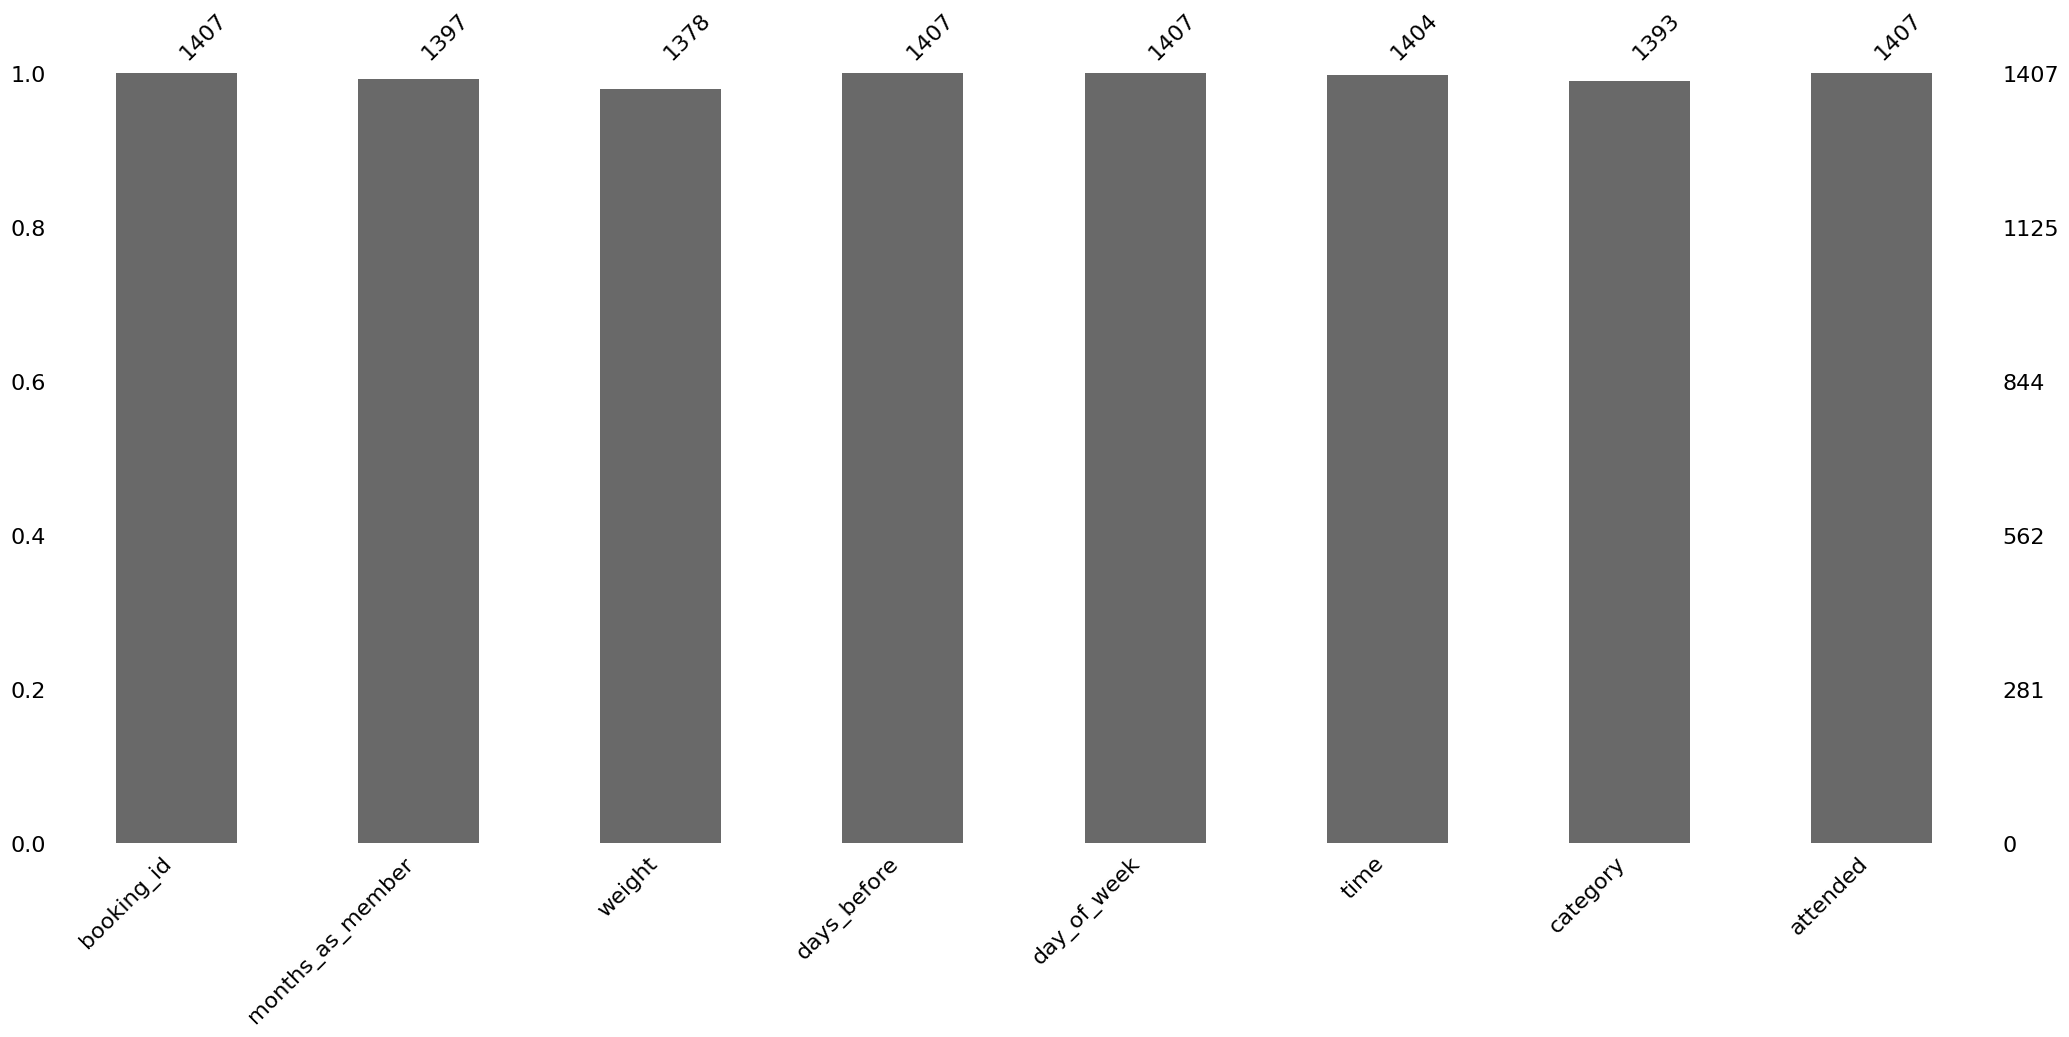

In [16]:
msno.bar(dfc)

<Axes: >

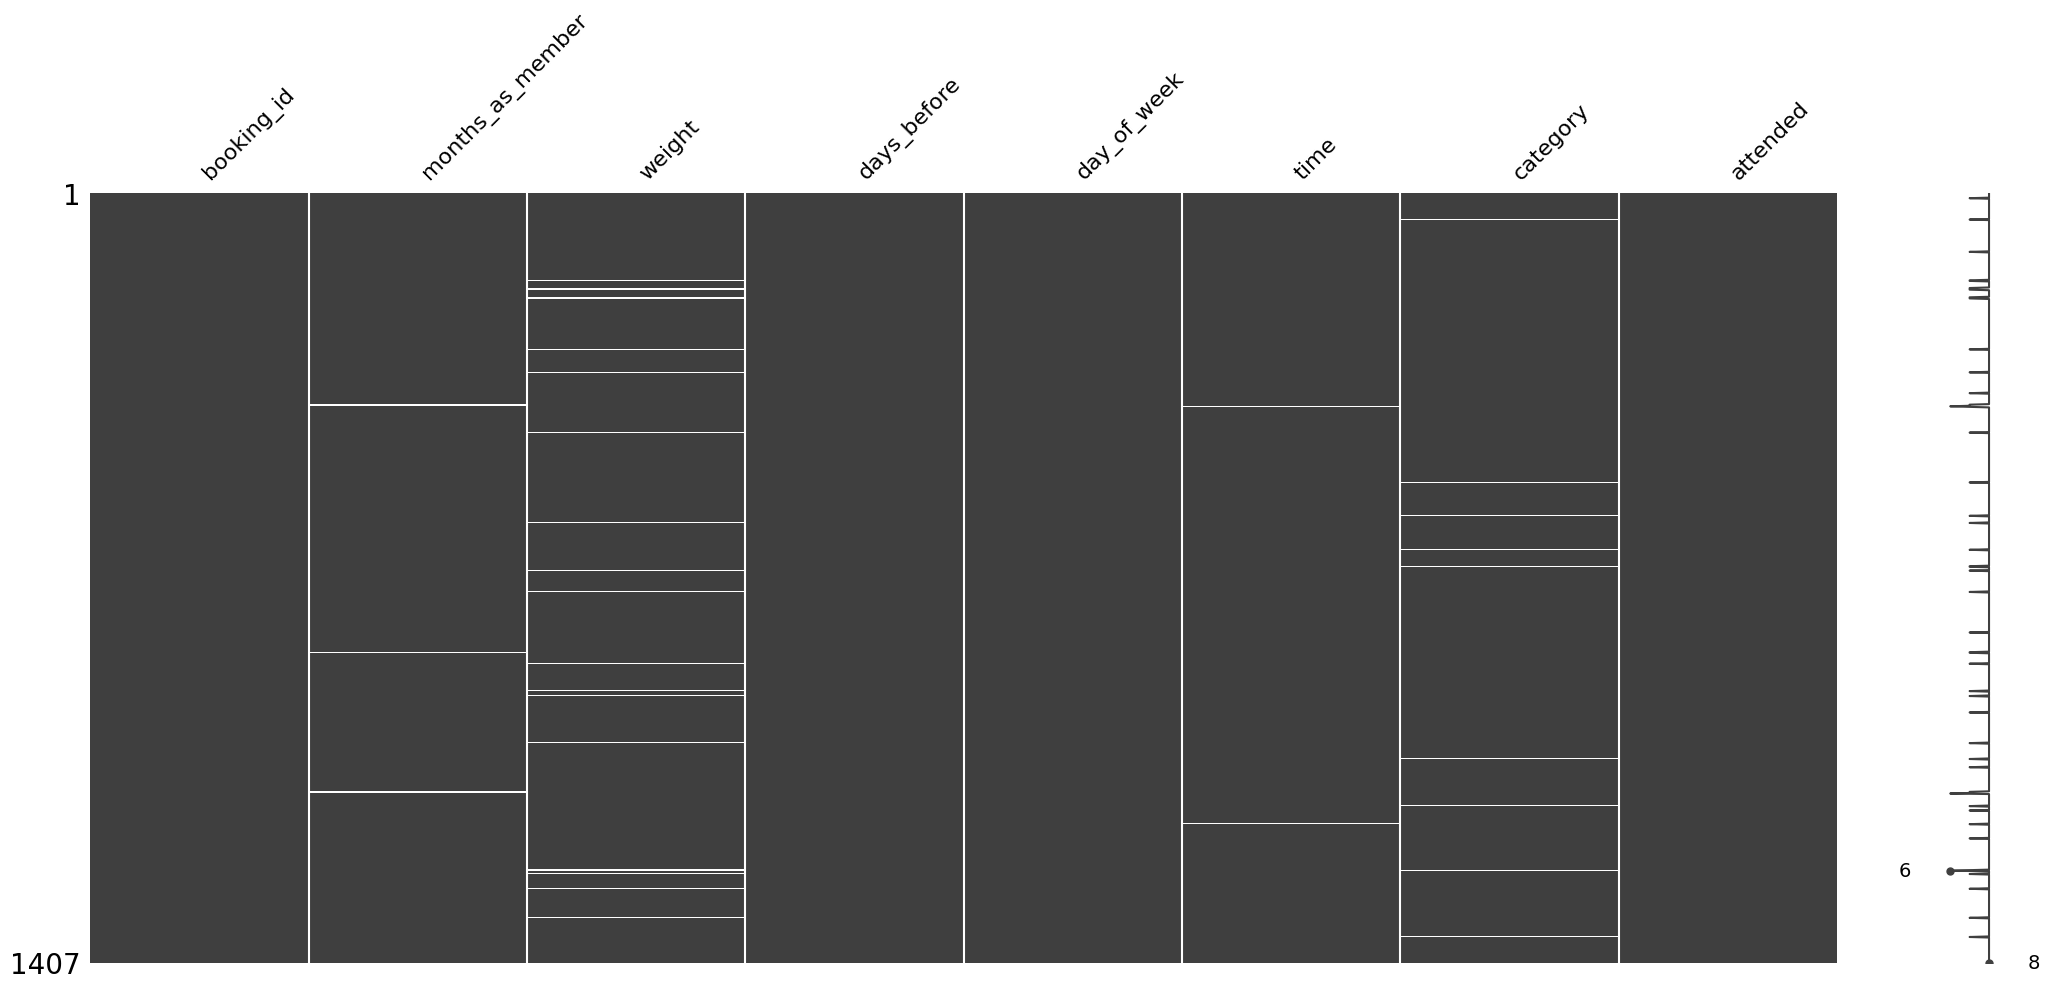

In [17]:
msno.matrix(dfc)

In [18]:
for col in dfc.columns:
  print(dfc[col].value_counts())

booking_id
1       1
1007    1
1015    1
1014    1
1013    1
       ..
513     1
512     1
511     1
510     1
1500    1
Name: count, Length: 1407, dtype: int64
months_as_member
8.0      90
7.0      89
6.0      83
9.0      77
5.0      76
         ..
62.0      1
105.0     1
89.0      1
90.0      1
69.0      1
Name: count, Length: 71, dtype: int64
weight
84.64    4
78.28    4
75.63    4
77.96    3
69.00    3
        ..
75.10    1
74.37    1
66.50    1
69.26    1
94.39    1
Name: count, Length: 1170, dtype: int64
days_before
10    270
2     191
8     183
14    166
12    162
4     149
6      69
7      36
5      31
3      31
11     26
13     25
9      23
15     23
1      10
0       4
16      3
17      3
20      1
29      1
Name: count, dtype: int64
day_of_week
Fri    277
Thu    225
Mon    219
Sun    205
Tue    187
Sat    185
Wed    109
Name: count, dtype: int64
time
AM    1062
PM     342
Name: count, dtype: int64
category
HIIT        626
Cycling     355
Strength    215
Yoga        127
Aqua 

missing_values is a string in my dataset i'm replacing with null values

In [19]:
dfc.replace("missing_value", np.nan, inplace=True)

Filling null Values

In [20]:
#using mean values of certain ranges to 'months_as_member' column
mv1 = round(dfc[(dfc['weight'] >= 65) & (dfc['weight'] <= 80)]['months_as_member'].mean())
dfc.loc[[386, 387, 838, 1093, 1094, 1095], 'months_as_member'] = mv1
mv2 = round(dfc[(dfc['weight'] > 80) & (dfc['weight'] <= 95)]['months_as_member'].mean())
dfc.loc[[160,388, 389, 839], 'months_as_member'] = mv2

print(dfc.isnull().sum())
dfc.loc[[160, 386, 387, 388, 389,1093,1094,1095]]


booking_id           0
months_as_member     0
weight              29
days_before          0
day_of_week          0
time                 3
category            14
attended             0
dtype: int64


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
160,181,12.0,90.78,12,Sat,AM,Cycling,0
386,426,20.0,66.77,4,Tue,AM,Strength,0
387,427,20.0,78.77,4,Tue,PM,HIIT,0
388,428,12.0,83.60,10,Fri,AM,Cycling,1
389,429,12.0,92.71,8,Thu,AM,NaN,0
1093,1165,20.0,72.29,0,Sat,AM,HIIT,0
1094,1166,20.0,71.94,0,Sat,AM,HIIT,1
1095,1167,20.0,80.65,5,Wed,PM,HIIT,0


In [21]:
#using mean values of certain ranges to 'weight' column
mv3 = round(dfc[(dfc['months_as_member'] >= 1) & (dfc['months_as_member'] <= 10)]['weight'].mean())
dfc.loc[[174,192,285,327,437,602,681,689,728,802,1243], 'weight'] = mv3
mv4 = round(dfc[(dfc['months_as_member'] > 11) & (dfc['months_as_member'] <= 20)]['weight'].median())
dfc.loc[[107,159,175,176,190,191,437,859,1048,1096,1178,1237,1270,1323], 'weight'] = mv4
mv5 = round(dfc[(dfc['months_as_member'] > 20) & (dfc['months_as_member'] <= 40)]['weight'].mean())
dfc.loc[[173,909,918,1004,1236], 'weight'] = mv5

print(dfc.isnull().sum())
dfc.loc[[107,159,173,174,175,176,190,191,192,285,327,437,602,681,689,728,802,859,909,918,1004,1048,1096,1178,1236,1237,1243,1270,1323]]

booking_id           0
months_as_member     0
weight               0
days_before          0
day_of_week          0
time                 3
category            14
attended             0
dtype: int64


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
107,115,14.0,79.0,10,Fri,AM,HIIT,0
159,167,18.0,79.0,12,Sat,AM,Strength,1
173,194,37.0,74.0,10,Fri,AM,Yoga,1
174,195,8.0,90.0,2,Mon,AM,Strength,0
175,196,11.0,79.0,4,Tue,PM,Aqua,0
176,197,15.0,79.0,12,Sat,AM,Strength,0
190,214,9.0,79.0,2,Mon,AM,Cycling,0
191,215,16.0,79.0,2,Mon,AM,HIIT,0
192,216,8.0,90.0,10,Fri,AM,Yoga,0
285,316,5.0,90.0,14,Sun,AM,HIIT,0


In [22]:
#using mean values of certain ranges to 'days_before' column
dfc['days_before'].loc[1091]=round(dfc[((dfc['months_as_member'] >= 1) & (dfc['months_as_member'] <= 7)) & (dfc['weight'] >= 90) & (dfc['weight'] <= 101)]['days_before'].mode()[0])
dfc['days_before'].loc[1092]=round(dfc[((dfc['months_as_member'] >= 10) & (dfc['months_as_member'] <= 15)) & (dfc['weight'] >= 80) & (dfc['weight'] <= 89)]['days_before'].mean())
dfc['days_before'].loc[1093:1094]=round(dfc[(dfc['months_as_member'] == 20.0) & (dfc['weight'] >= 70) & (dfc['weight'] <= 75)]['days_before'].median())
dfc.isnull().sum()

booking_id           0
months_as_member     0
weight               0
days_before          0
day_of_week          0
time                 3
category            14
attended             0
dtype: int64

In [23]:
#using mean values of certain ranges to 'category' column
dfc.loc[[9, 48,365, 389, 948, 1033,1119,1127,1237,1358], 'category'] = dfc[((dfc['months_as_member'] >= 0) & (dfc['months_as_member'] <= 30)) &
                  (dfc['weight'] >= 65) & (dfc['weight'] <= 80)]['category'].mode()[0]
dfc.loc[[528, 589,651, 682], 'category'] = dfc[((dfc['months_as_member'] >= 4) & (dfc['months_as_member'] <= 30)) &
                  (dfc['weight'] >= 80) & (dfc['weight'] <= 105)]['category'].mode()[0]
dfc.loc[[9,48,365, 389,528, 589,651, 682, 948, 1033,1119,1127,1237,1358]]
dfc.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                3
category            0
attended            0
dtype: int64

In [24]:
#using mean values of certain ranges to 'time' column
dfc['time'].fillna(method='ffill', inplace=True)
dfc.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

## Encoding

In [25]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [26]:
c=dfc.copy()
c.sample(5)


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
551,605,6.0,90.60,14,Sat,PM,HIIT,0
377,417,6.0,101.70,5,Tue,PM,Aqua,0
861,933,17.0,68.55,8,Thu,AM,HIIT,1
1327,1421,22.0,68.29,12,Sat,AM,HIIT,1
637,691,38.0,77.43,6,Wed,AM,Cycling,1


In [27]:
c = pd.get_dummies(c, columns=['time'])
c['time'] = c['time_AM'].astype(int)
c.drop(columns=['time_PM','time_AM'], inplace=True)
c.head(5)

,booking_id,months_as_member,weight,days_before,day_of_week,category,attended,time
0,1,17.0,79.56,8,Wed,Strength,0,0
1,2,10.0,79.01,2,Mon,HIIT,0,1
2,3,16.0,74.53,14,Sun,Strength,0,1
3,4,5.0,86.12,10,Fri,Cycling,0,1
4,5,15.0,69.29,8,Thu,HIIT,0,1


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
e = le.fit_transform(c['category'])  # Fit and transform on the Series
c['category']=e
c.head(5)

,booking_id,months_as_member,weight,days_before,day_of_week,category,attended,time
0,1,17.0,79.56,8,Wed,3,0,0
1,2,10.0,79.01,2,Mon,2,0,1
2,3,16.0,74.53,14,Sun,3,0,1
3,4,5.0,86.12,10,Fri,1,0,1
4,5,15.0,69.29,8,Thu,2,0,1


In [29]:
col_map = {'Wed':3, 'Fri':5, 'Mon':1, 'Sun':0,'Sat':6,'Tue':2,'Thu':4}
c['day_of_week'] = c['day_of_week'].replace(col_map)
c['day_of_week'].unique()

array([3, 1, 0, 5, 4, 2, 6])

In [30]:
desired_columns = ['booking_id', 'months_as_member', 'weight', 'days_before','day_of_week', 'time', 'category', 'attended']
c['weight'] = c['weight'].round(2)
#convert months_as_member to integer
c['months_as_member'] = c['months_as_member'].astype(int)
c = c[desired_columns]
c

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,0,3,0
1,2,10,79.01,2,1,1,2,0
2,3,16,74.53,14,0,1,3,0
3,4,5,86.12,10,5,1,1,0
4,5,15,69.29,8,4,1,2,0
...,...,...,...,...,...,...,...,...
1402,1496,21,79.51,10,5,1,2,0
1403,1497,29,89.55,2,1,1,3,0
1404,1498,9,87.38,4,2,1,2,0
1405,1499,34,68.64,14,0,1,0,0


checking missing values

Creatinging new dataframe to not to disturb previous process

In [31]:
dfc1=c.copy()
dfc1.head(5)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,0,3,0
1,2,10,79.01,2,1,1,2,0
2,3,16,74.53,14,0,1,3,0
3,4,5,86.12,10,5,1,1,0
4,5,15,69.29,8,4,1,2,0


In [32]:
dfc1.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

<Axes: >

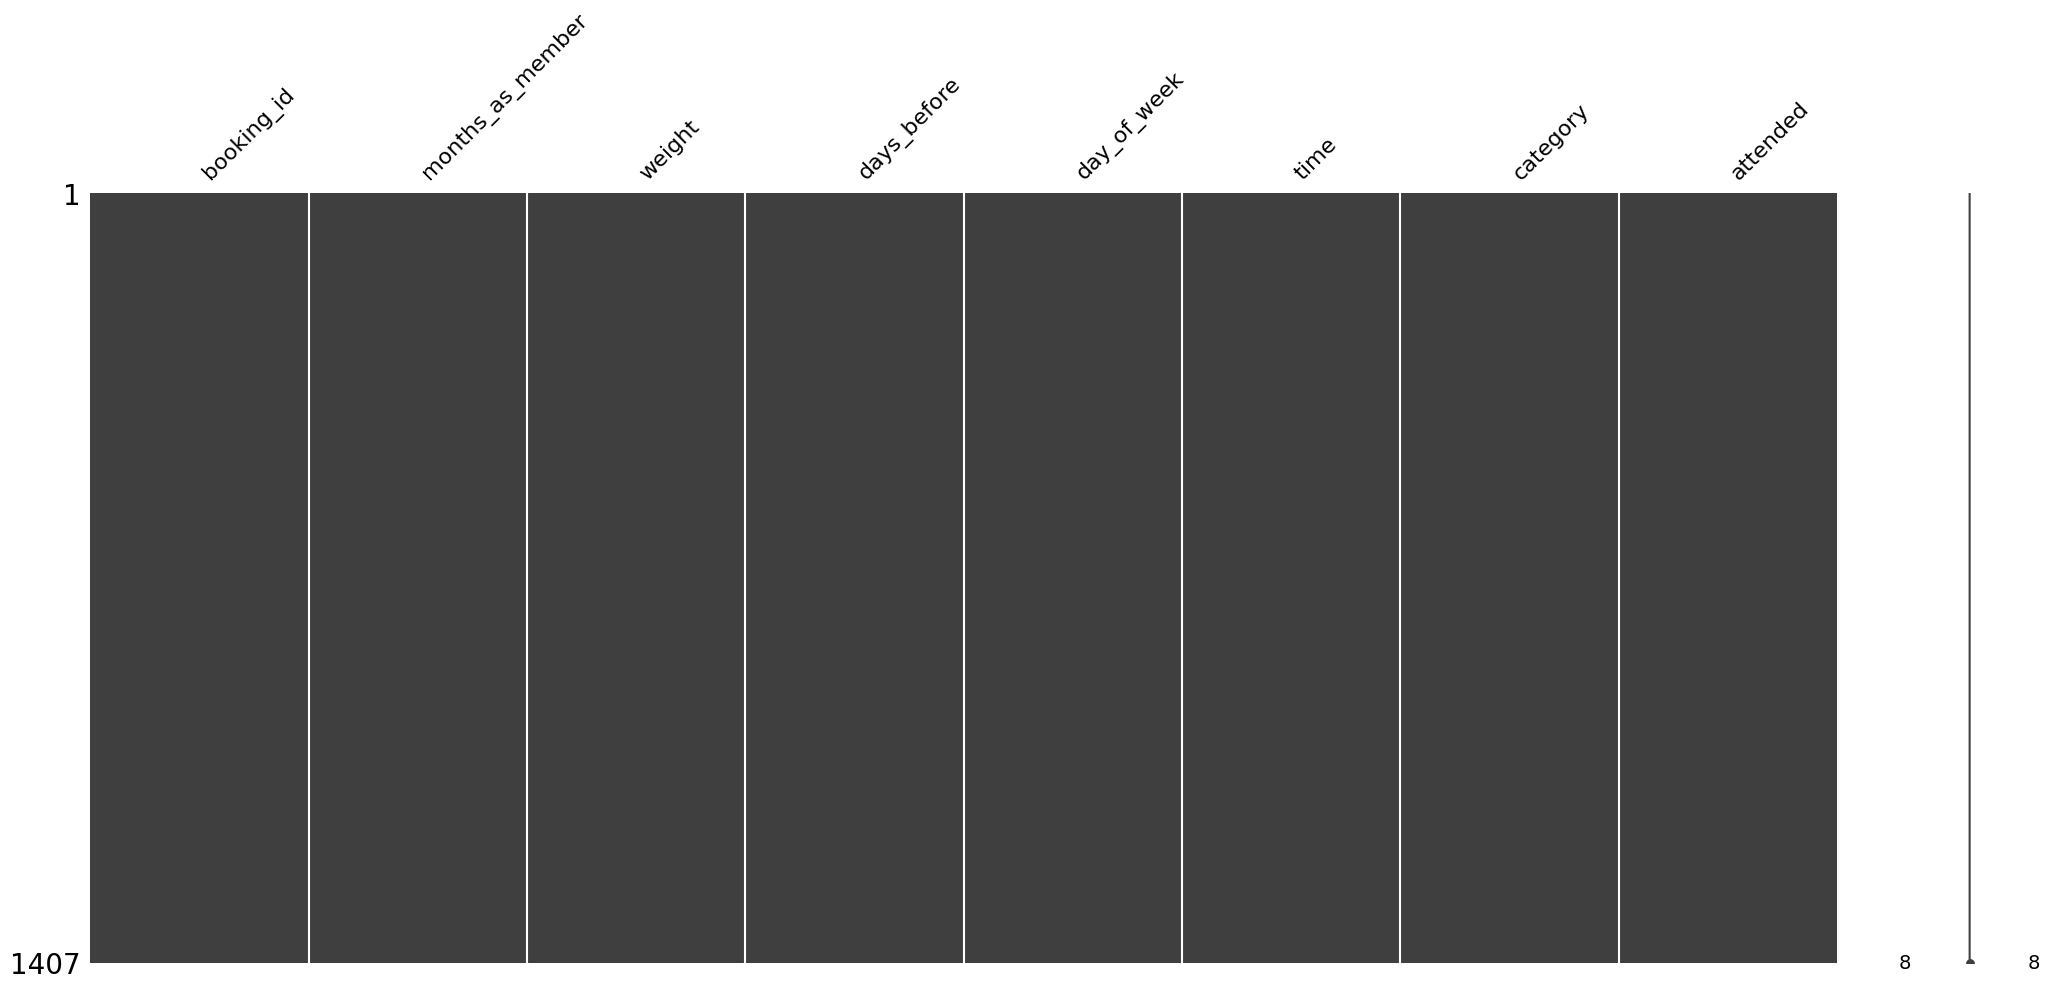

In [33]:
msno.matrix(dfc1)

## Visualization

<Axes: >

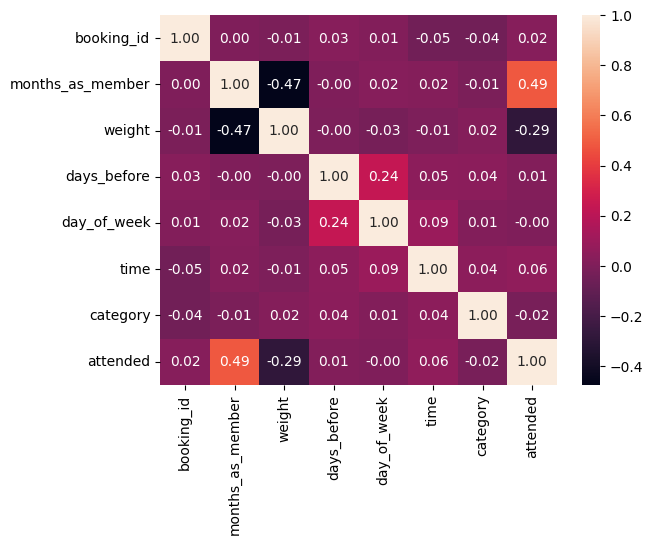

In [34]:
sns.heatmap(dfc1.corr(), annot=True, fmt='.2f')

<Axes: xlabel='attended', ylabel='count'>

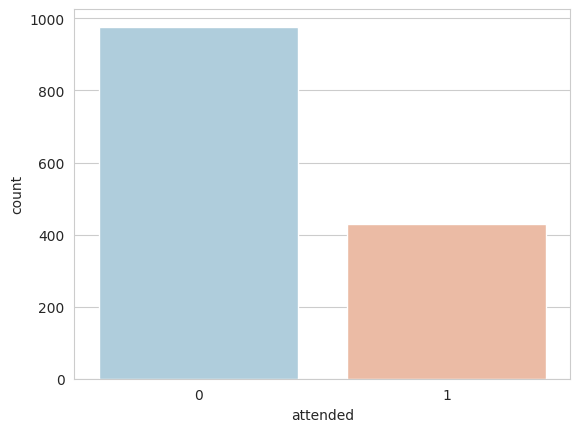

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='attended',data=dfc1,palette='RdBu_r')

<Axes: xlabel='attended', ylabel='count'>

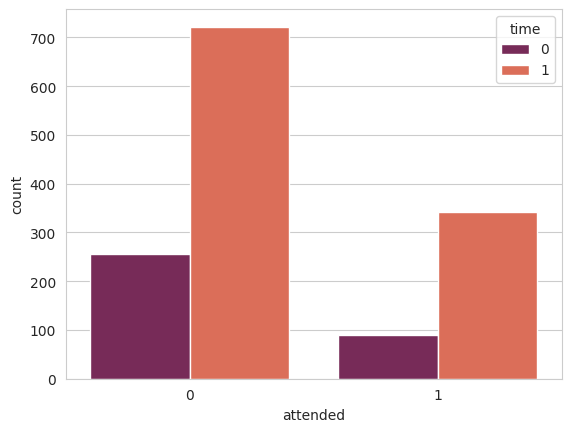

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='attended',hue='time',data=dfc1,palette='rocket')


<Axes: xlabel='weight', ylabel='Density'>

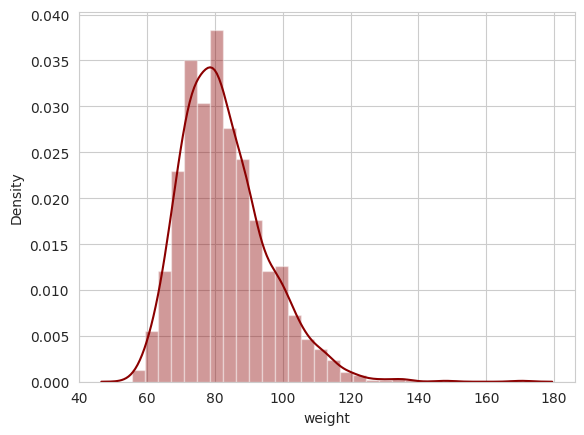

In [37]:
sns.distplot(dfc1['weight'].dropna(),color='darkred',bins=30)

<Axes: xlabel='day_of_week', ylabel='count'>

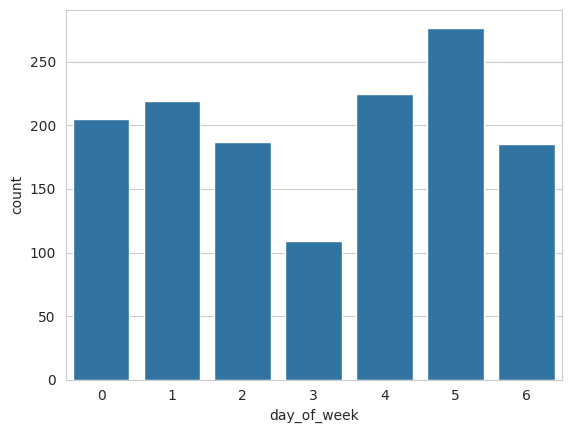

In [38]:
sns.countplot(x='day_of_week',data=dfc1)

<Figure size 1000x600 with 0 Axes>

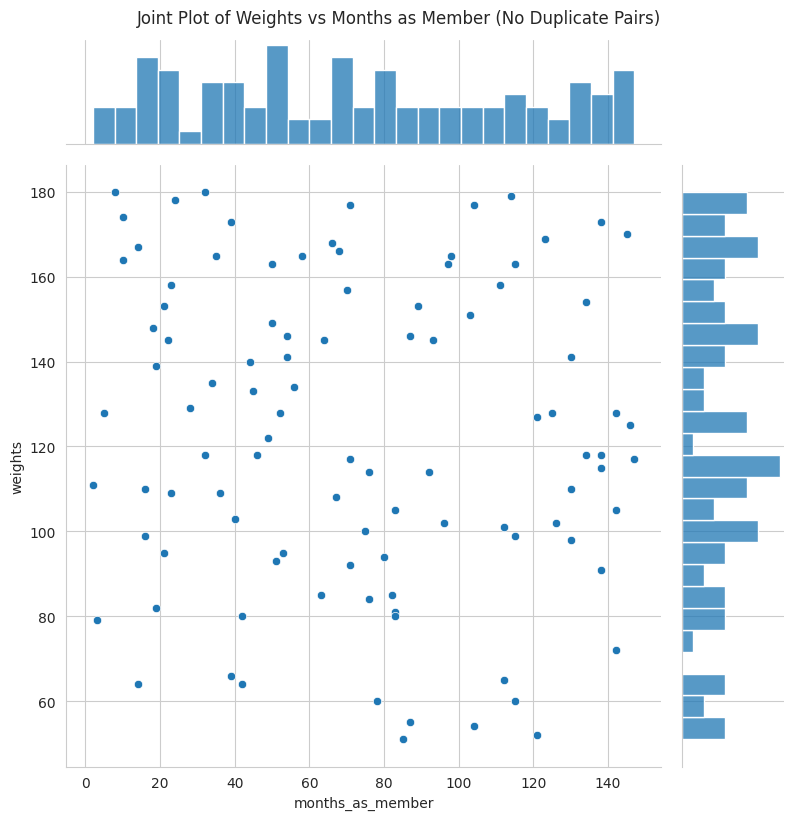

In [39]:
num_samples = 100
months_as_member = np.random.randint(1, 151, num_samples)
weights = np.random.randint(50, 181, num_samples)

data = pd.DataFrame({'months_as_member': months_as_member, 'weights': weights})
data = data.drop_duplicates()

# Create joint plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='months_as_member', y='weights', data=data, kind='scatter', height=8, marginal_kws=dict(bins=25, fill=True))

plt.suptitle('Joint Plot of Weights vs Months as Member (No Duplicate Pairs)', y=1.02)
plt.show()

<Axes: xlabel='months_as_member', ylabel='weight'>

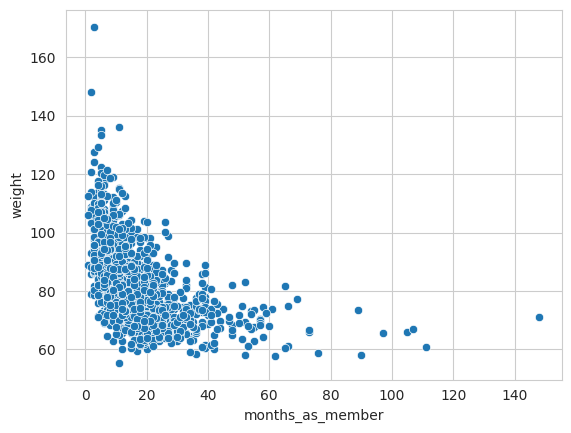

In [40]:
sns.scatterplot(y='weight',x='months_as_member',data=dfc1)

<Axes: xlabel='day_of_week', ylabel='months_as_member'>

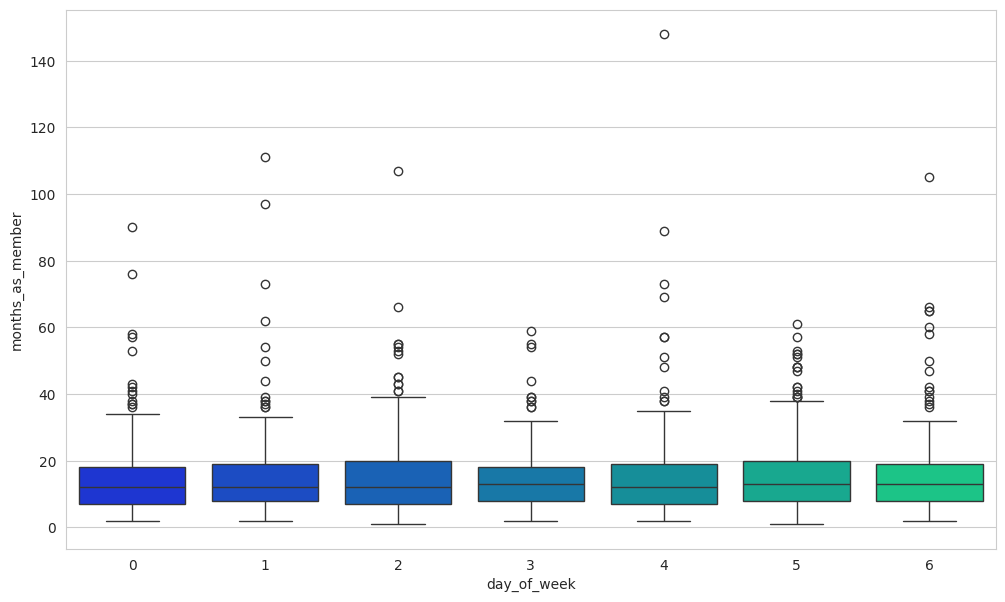

In [41]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='day_of_week',y='months_as_member',data=dfc1,palette='winter')

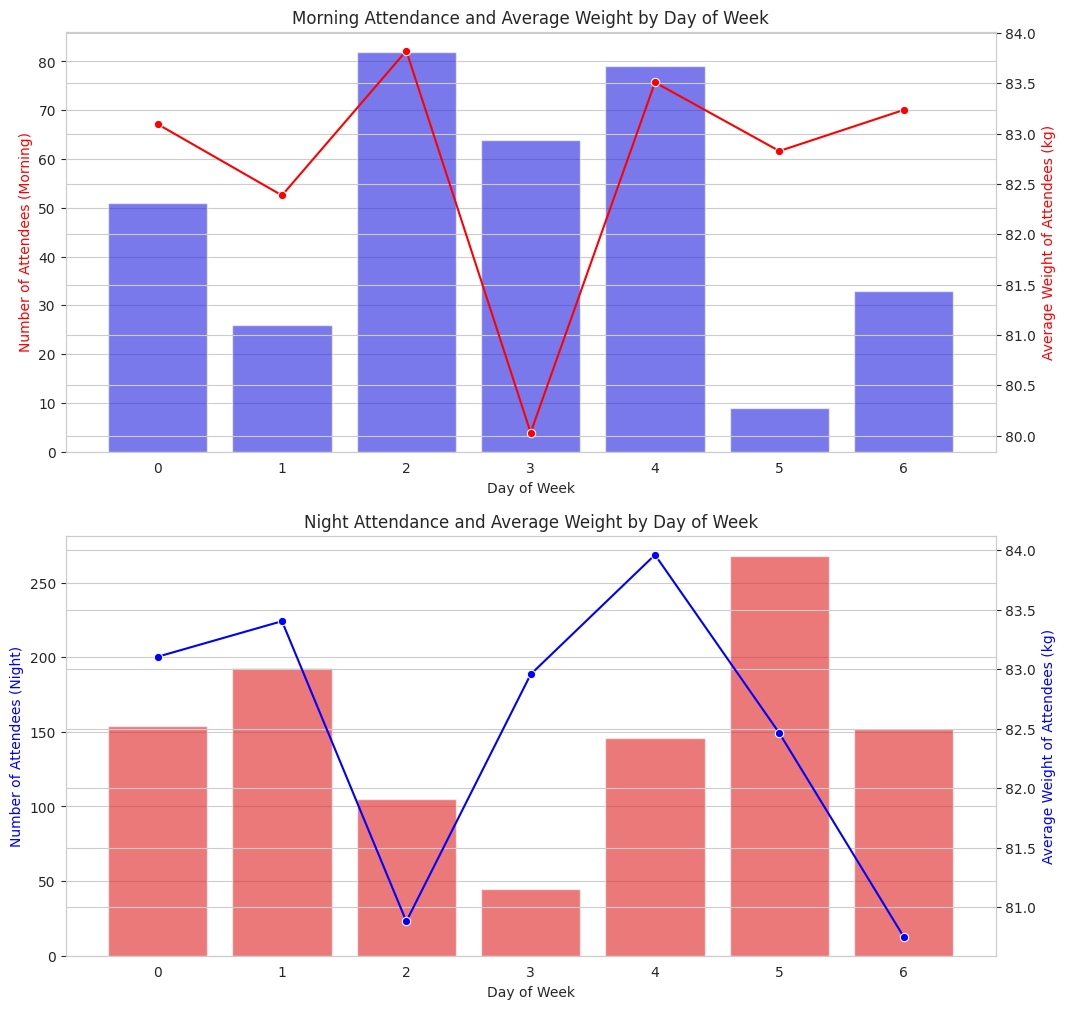

In [42]:
dfc1_am = dfc1[dfc1['time'] == 0]
dfc1_pm = dfc1[dfc1['time'] == 1]

attendance_by_day_am = dfc1_am.groupby('day_of_week').size().reset_index(name='attendance_count_am')
weight_by_day_am = dfc1_am.groupby('day_of_week')['weight'].mean().reset_index(name='average_weight_am')

attendance_by_day_pm = dfc1_pm.groupby('day_of_week').size().reset_index(name='attendance_count_pm')
weight_by_day_pm = dfc1_pm.groupby('day_of_week')['weight'].mean().reset_index(name='average_weight_pm')

attendance_weight_by_day_am = pd.merge(attendance_by_day_am, weight_by_day_am, on='day_of_week')
attendance_weight_by_day_pm = pd.merge(attendance_by_day_pm, weight_by_day_pm, on='day_of_week')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x='day_of_week', y='attendance_count_am', data=attendance_weight_by_day_am, ax=ax1, color='blue', alpha=0.6)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Attendees (Morning)', color='red')
ax1.set_title('Morning Attendance and Average Weight by Day of Week')

ax1_2 = ax1.twinx()
sns.lineplot(x='day_of_week', y='average_weight_am', data=attendance_weight_by_day_am, ax=ax1_2, color='red', marker='o')
ax1_2.set_ylabel('Average Weight of Attendees (kg)', color='red')

sns.barplot(x='day_of_week', y='attendance_count_pm', data=attendance_weight_by_day_pm, ax=ax2, color='red', alpha=0.6)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Number of Attendees (Night)', color='blue')
ax2.set_title('Night Attendance and Average Weight by Day of Week')

ax2_2 = ax2.twinx()
sns.lineplot(x='day_of_week', y='average_weight_pm', data=attendance_weight_by_day_pm, ax=ax2_2, color='blue', marker='o')
ax2_2.set_ylabel('Average Weight of Attendees (kg)', color='blue')

plt.show()

In [43]:
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4','Category 5']

am_attended = []
pm_attended = []

for category in range(0, 5):  # Loop through categories 1 to 4
    category_am = []
    category_pm = []
    for weight_range in weights:
        low, high = map(int, weight_range.split('-'))
        for day in range(4):
            count_am = dfc1[(dfc1['time'] == 0) &
                (dfc1['attended'] == 1) &
                (dfc1['category'] == category) &
                (dfc1['weight'] >= low) &
                (dfc1['weight'] <= high) &
                (dfc1['day_of_week'] == day)
            ].shape[0]
            category_am.append(count_am)

            count_pm = dfc1[
                (dfc1['time'] == 1) &
                (dfc1['attended'] == 1) &
                (dfc1['category'] == category) &
                (dfc1['weight'] >= low) &
                (dfc1['weight'] <= high) &
                (dfc1['day_of_week'] == day)
            ].shape[0]
            category_pm.append(count_pm)
    am_attended.append(category_am)
    pm_attended.append(category_pm)

print(am_attended)
print(pm_attended)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 2, 1, 2, 3, 4, 1, 2, 0, 1, 0, 0, 1, 0, 1], [2, 2, 4, 1, 4, 0, 2, 4, 0, 0, 3, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0], [4, 3, 0, 0, 8, 3, 2, 5, 4, 3, 3, 1, 1, 3, 1, 0], [5, 5, 6, 1, 7, 8, 12, 1, 6, 7, 4, 2, 3, 0, 1, 1], [1, 5, 1, 0, 5, 4, 1, 0, 1, 5, 3, 0, 1, 0, 0, 0], [2, 2, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]


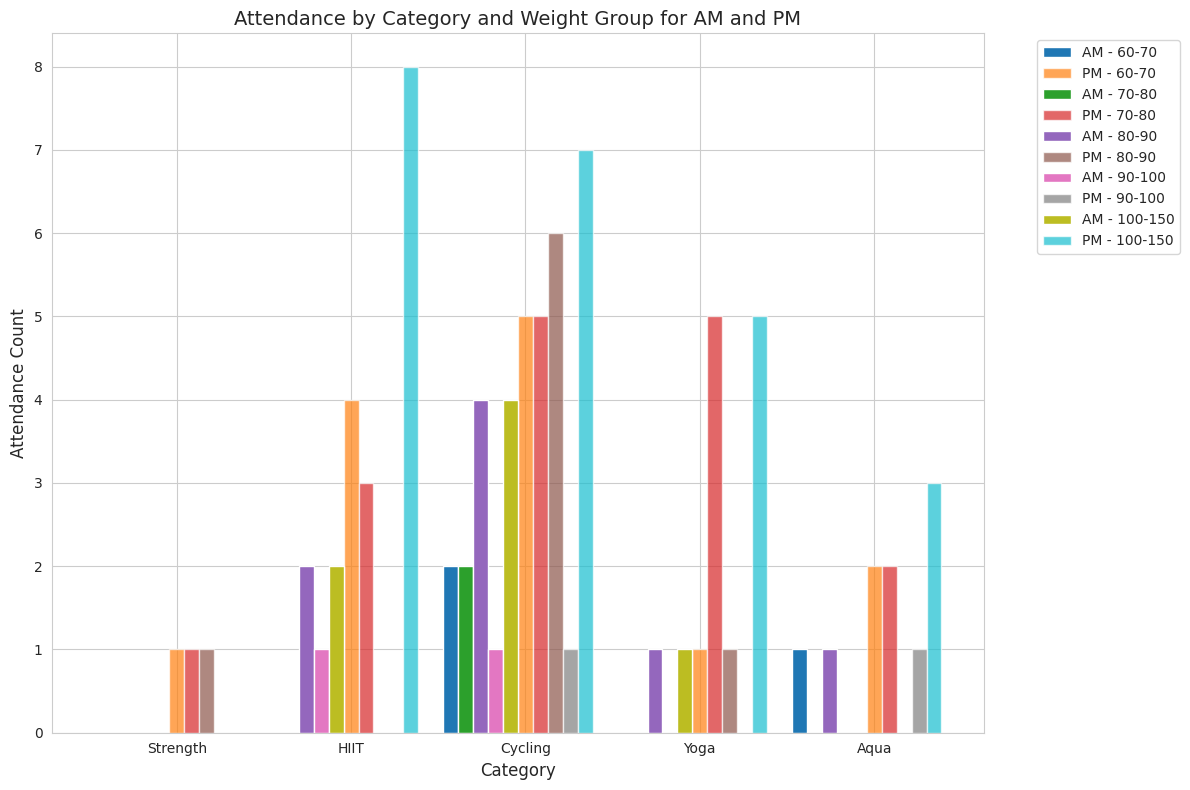

In [44]:
categories = ['Strength', 'HIIT', 'Cycling', 'Yoga','Aqua']
weights = ['60-70', '70-80', '80-90', '90-100','100-150']
days_of_week = ['Day 0','Day 1', 'Day 2', 'Day 3', 'Day 4','Day 5', 'Day 6']

# Attendance data for AM and PM
am_attendance = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 2, 1, 2, 3, 4, 1, 2, 0, 1, 0, 0, 1, 0, 1], [2, 2, 4, 1, 4, 0, 2, 4, 0, 0, 3, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
pm_attendance = [[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0], [4, 3, 0, 0, 8, 3, 2, 5, 4, 3, 3, 1, 1, 3, 1, 0], [5, 5, 6, 1, 7, 8, 12, 1, 6, 7, 4, 2, 3, 0, 1, 1], [1, 5, 1, 0, 5, 4, 1, 0, 1, 5, 3, 0, 1, 0, 0, 0], [2, 2, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

# Calculate positions for bars to avoid overlap and add spacing
num_categories = len(categories)
num_weights = len(weights)
bar_width = 0.3  # Width of each bar
group_spacing = 0.5  # Space between category groups
total_width = (num_weights * bar_width * 2) + (num_categories - 1) * group_spacing  # Total width needed for the plot

# Calculate starting position for each category group
group_starts = np.arange(num_categories) * (bar_width * num_weights * 2 + group_spacing)

plt.figure(figsize=(12, 8))

# Plotting bars with spacing
for i in range(num_weights):
    am_positions = group_starts + i * bar_width
    pm_positions = group_starts + (i + num_weights) * bar_width
    plt.bar(am_positions, [item[i] for item in am_attendance], bar_width, label=f'AM - {weights[i]}')
    plt.bar(pm_positions, [item[i] for item in pm_attendance], bar_width, label=f'PM - {weights[i]}', alpha=0.7)

plt.xlabel('Category', fontsize=12)
plt.ylabel('Attendance Count', fontsize=12)
plt.title('Attendance by Category and Weight Group for AM and PM', fontsize=14)
plt.xticks(group_starts + (num_weights * bar_width), categories, fontsize=10)  # Center x-ticks under groups
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

<Axes: xlabel='time', ylabel='weight'>

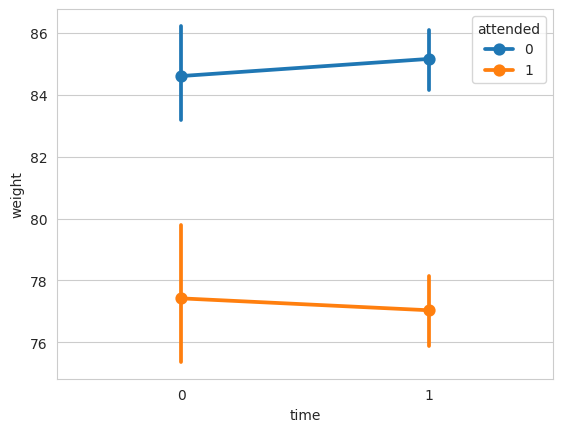

In [70]:
sns.pointplot(x='time',y='weight',hue='attended',data=dfc1)

## Model Training

In [45]:
!pip install scikit-learn

## XG Boost

In [46]:
from sklearn.model_selection import train_test_split
r=np.random.randint(100)
t=0.20
x_Train, x_Test, y_Train, y_Test = train_test_split(
    dfc1.drop(columns=["attended"]),
    dfc1["attended"],
    test_size=t,
    random_state=39
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
ada_base = XGBClassifier(learning_rate=0.1,n_estimators=100,random_state=r)
ada_base.fit(x_Train,y_Train)
train_ada_base_pred=ada_base.predict(x_Train)
test_ada_base_pred=ada_base.predict(x_Test)
train_ada_base_prob=ada_base.predict_proba(x_Train)
test_ada_base_prob=ada_base.predict_proba(x_Test)
print("random state:", 39)
print("Testing Accuracy:",accuracy_score(y_Test,test_ada_base_pred)*100)
print("Training Accuracy:",accuracy_score(y_Train,train_ada_base_pred)*100)


random state: 39
Testing Accuracy: 78.72340425531915
Training Accuracy: 92.71111111111111


random state: 96
Testing Accuracy: 76.59574468085107
Training Accuracy: 92.80000000000001

random state: 92
Testing Accuracy: 76.24113475177306
Training Accuracy: 91.82222222222222

random state: 23
Testing Accuracy: 79.07801418439716
Training Accuracy: 92.71111111111111


random state: 39
Testing Accuracy: 78.72340425531915
Training Accuracy: 92.35555555555555

## Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
r=np.random.randint(100)
t=0.10
x_Train, x_Test, y_Train, y_Test = train_test_split(
    dfc1.drop(columns=["attended"]),
    dfc1["attended"],
    test_size=t,
    random_state=61
)
gb_classifier = GradientBoostingClassifier(learning_rate=0.2,n_estimators=50,random_state=r )
gb_classifier.fit(x_Train,y_Train)
train_gb_pred = gb_classifier.predict(x_Train)
test_gb_pred = gb_classifier.predict(x_Test)
train_gb_prob = gb_classifier.predict_proba(x_Train)
test_gb_prob = gb_classifier.predict_proba(x_Test)
print("random:", 61)

print("Testing Accuracy:",accuracy_score(y_Test,test_gb_pred)*100)
print("Training Accuracy:",accuracy_score(y_Train,train_gb_pred)*100)

random: 61
Testing Accuracy: 81.56028368794325
Training Accuracy: 86.25592417061611


##split:0.10
random: 61
Testing Accuracy: 82.26950354609929
Training Accuracy: 86.25592417061611


## ADA Boost

In [48]:
#performing adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
t=0.20
r=4
x_Train, x_Test, y_Train, y_Test = train_test_split(
    dfc1.drop(columns=["attended"]),
    dfc1["attended"],
    test_size=t,
    random_state=r
)

ada_base=AdaBoostClassifier(learning_rate=1.0,n_estimators=10,random_state=r)
ada_base.fit(x_Train,y_Train)
train_ada_base_pred=ada_base.predict(x_Train)
test_ada_base_pred=ada_base.predict(x_Test)
train_ada_base_prob=ada_base.predict_proba(x_Train)
test_ada_base_prob=ada_base.predict_proba(x_Test)
print('split%: ', t)
print("random state:", r)
print("Testing Accuracy:",accuracy_score(y_Test,test_ada_base_pred)*100)
print("Training Accuracy:",accuracy_score(y_Train,train_ada_base_pred)*100)

split%:  0.2
random state: 4
Testing Accuracy: 75.53191489361703
Training Accuracy: 76.88888888888889


## split%:  0.2

random state: 16
Testing Accuracy: 80.48780487804879
Training Accuracy: 77.70979020979021

##split%:  0.25
random state: 4
Testing Accuracy: 80.72625698324022
Training Accuracy: 78.75116495806151

##split%: 0.3
random state: 51
Testing Accuracy: 78.6046511627907
Training Accuracy: 78.52147852147851

random state: 82
Testing Accuracy: 79.30232558139535
Training Accuracy: 77.92207792207793

##split%:  0.4
random state: 54
Testing Accuracy: 81.15183246073299
Training Accuracy: 76.34032634032634

random state: 13
Testing Accuracy: 78.88307155322862
Training Accuracy: 78.2051282051282

## split%:  0.35
random state: 71
Testing Accuracy: 80.23952095808383
Training Accuracy: 76.88172043010752

random state: 3
Testing Accuracy: 79.24151696606786
Training Accuracy: 77.84946236559139



## Decision Tree

In [49]:
from sklearn.model_selection import train_test_split
# Double-check the shape of your data and labels after splitting

r= np.random.randint(100)
x_Train, x_Test, y_Train, y_Test = train_test_split(
    dfc1.drop(columns=["attended"]),
    dfc1[["attended"]],
    test_size=0.2,
    random_state=33
)
print("Shape of x_Train:", x_Train.shape)
print("Shape of y_Train:", y_Train.shape)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=2)
classifier.fit(x_Train, y_Train)
y_pred=classifier.predict(x_Test)
y_pred
x_pred=classifier.predict(x_Train)
x_pred
from sklearn.metrics import accuracy_score
print("random_state: ", 33)
print("Decision Tree Testing Accuracy:",accuracy_score(y_Test,y_pred)*100)
print("Decision Tree Training Accuracy:",accuracy_score(x_pred,y_Train)*100)


Shape of x_Train: (1125, 7)
Shape of y_Train: (1125, 1)
random_state:  33
Decision Tree Testing Accuracy: 79.07801418439716
Decision Tree Training Accuracy: 77.5111111111111


##split: 0.4
random_state:  35
Decision Tree Testing Accuracy: 78.86323268206039
Decision Tree Training Accuracy: 77.13270142180096


##spli:0.35

random_state:  52
Decision Tree Testing Accuracy: 78.09330628803245
Decision Tree Training Accuracy: 77.68052516411379

#split: 0.30

random_state:  38
Decision Tree Testing Accuracy: 78.25059101654847
Decision Tree Training Accuracy: 77.64227642276423

##spli: 0.25

random_state:  55
Decision Tree Testing Accuracy: 79.26136363636364
Decision Tree Training Accuracy: 77.34597156398104

random_state:  35
Decision Tree Testing Accuracy: 80.39772727272727
Decision Tree Training Accuracy: 76.96682464454976

##split: 0.2

random_state:  33
Decision Tree Testing Accuracy: 79.07801418439716
Decision Tree Training Accuracy: 77.51111111111111

##Random Forest

In [50]:
from sklearn.model_selection import train_test_split
# Double-check the shape of your data and labels after splitting

r= np.random.randint(100)
x_Train, x_Test, y_Train, y_Test = train_test_split(
    dfc1.drop(columns=["attended"]),
    dfc1[["attended"]],
    test_size=0.4,
    random_state=17
)
print("Shape of x_Train:", x_Train.shape)
print("Shape of y_Train:", y_Train.shape)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3,max_leaf_nodes=4)
rfc.fit(x_Train, y_Train)
rfc.fit(x_Train, y_Train)
y_pred=rfc.predict(x_Test)
y_pred
x_pred=rfc.predict(x_Train)
x_pred
from sklearn.metrics import accuracy_score
print("random sate:", 17)
print("Testing Accuracy:",accuracy_score(y_Test,y_pred)*100)
print("Training Accuracy:",accuracy_score(x_pred,y_Train)*100)


Shape of x_Train: (844, 7)
Shape of y_Train: (844, 1)
random sate: 17
Testing Accuracy: 78.50799289520425
Training Accuracy: 77.3696682464455


## split: 0.40

random sate: 17
Testing Accuracy: 79.39609236234459
Training Accuracy: 77.60663507109004

##split%: 35

random sate: 2
Testing Accuracy: 78.70182555780933
Training Accuracy: 77.78993435448578

##split: 0.30

random sate: 189
Training Accuracy: 79.47154471544715
Testing Accuracy: 73.5224586288416

## split: 0.25

random sate: 283
Training Accuracy: 78.48888888888888
Testing Accuracy: 77.30496453900709

# split:0.20

random sate: 238
Training Accuracy: 77.72511848341233
Testing Accuracy: 76.13636363636364


## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#r=np.random.randint(100)
r=40
t=0.20
x_Train, x_Test, y_Train, y_Test = train_test_split(
    dfc1.drop(columns=["attended"]),
    dfc1["attended"],
    test_size=t,
    random_state=r
)
logmodel = LogisticRegression()
logmodel.fit(x_Train, y_Train)
y_pred = logmodel.predict(x_Test)
x_pred = logmodel.predict(x_Train)
print('split%: ', t)
print("random state:", r)
print("Accuracy_Test:", accuracy_score(y_Test, y_pred)*100)
print("Accuracy_Train:", accuracy_score(y_Train, x_pred)*100)

split%:  0.2
random state: 40
Accuracy_Test: 80.1418439716312
Accuracy_Train: 77.15555555555555


##split%:  0.4
random state: 33
Accuracy_Test: 0.7939609236234458
Accuracy_Train: 0.7701421800947867

##split%:  0.35
random state: 83
Accuracy_Test: 0.7910750507099391
Accuracy_Train: 0.7768052516411379

##split%:  0.30
random state: 36
Accuracy_Test: 0.7943262411347518
Accuracy_Train: 0.7713414634146342

##split%:  0.25
random state: 90
Accuracy_Test: 0.8039772727272727
Accuracy_Train: 0.7668246445497631

##split%: 0.20
random state: 40
Accuracy_Test: 0.8014184397163121
Accuracy_Train: 0.7715555555555556

## Evaluation Metrics

In [52]:
!pip install scikit-learn

<Axes: >

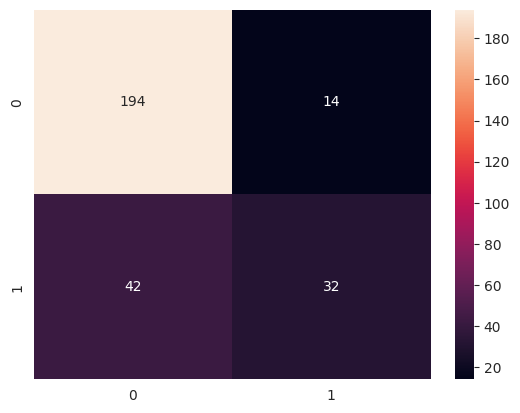

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_Test,y_pred)
sns.heatmap(data = cm,annot = True, fmt='d')

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean absolute error: %.2f "% mean_absolute_error(y_Test,y_pred))
print("Mean squared error: %.2f "% mean_squared_error(y_Test,y_pred))
print("Root mean squared error: %.2f "% np.sqrt(mean_squared_error(y_Test,y_pred)))
print("R square: %.2f"% r2_score(y_Test,y_pred))

Mean absolute error: 0.20 
Mean squared error: 0.20 
Root mean squared error: 0.45 
R square: -0.03


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_Test, y_pred)
recall = recall_score(y_Test, y_pred)
f1 = f1_score(y_Test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6956521739130435
Recall: 0.43243243243243246
F1 Score: 0.5333333333333333


In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       208
           1       0.70      0.43      0.53        74

    accuracy                           0.80       282
   macro avg       0.76      0.68      0.70       282
weighted avg       0.79      0.80      0.78       282



In [57]:
from sklearn.metrics import log_loss
y_prob = logmodel.predict_proba(x_Test)[:, 1]
log_loss_value = log_loss(y_Test, y_prob)
print("Log Loss:", log_loss_value)

Log Loss: 0.4746785283564797


## ROC-AUC Curve

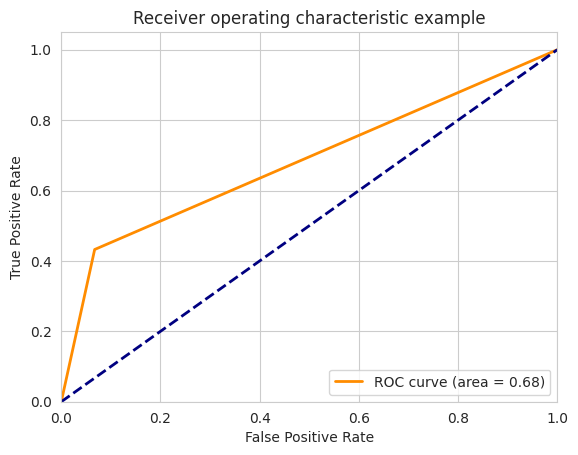

In [58]:
# Assuming 'y_Test' and 'y_pred' are multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_Test, classes=np.unique(y_Test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_Test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class (example for class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##Cross Validation

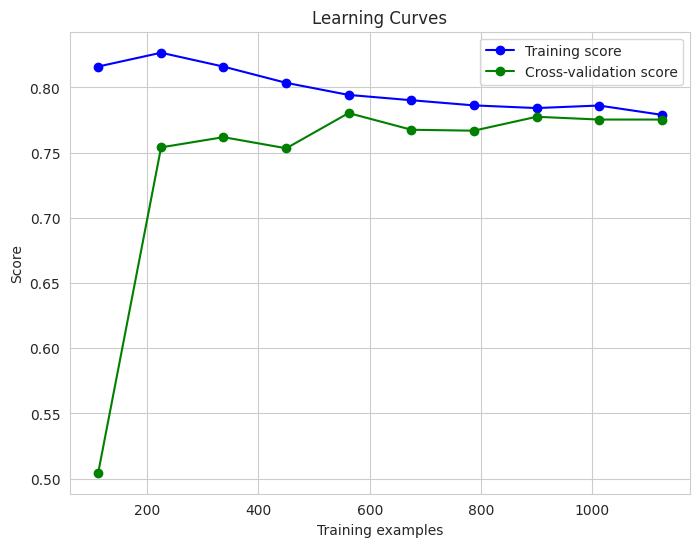

In [59]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(logmodel, dfc1.drop('attended', axis=1), dfc1['attended'], cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.show()
print()


##Coefficienct Of Logistic Regression

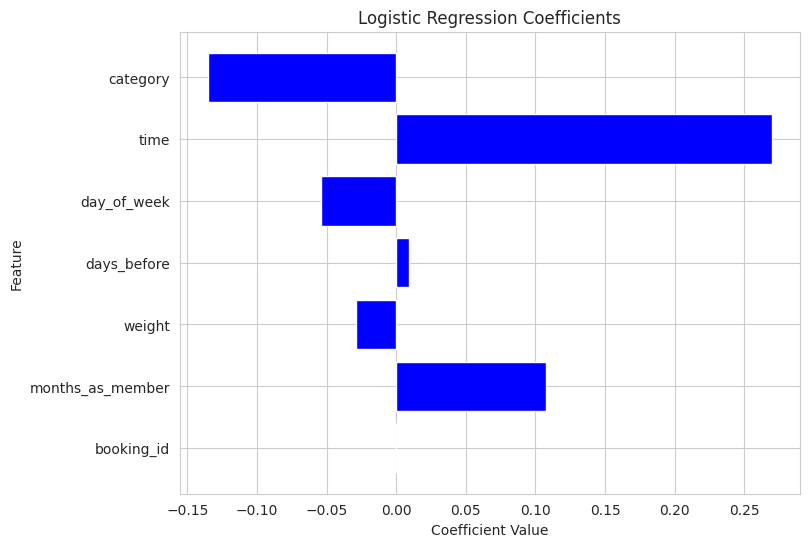

In [60]:
# Get the feature names and coefficients
feature_names = dfc1.drop('attended', axis=1).columns
coefficients = logmodel.coef_[0]

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

##SVM

In [61]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
t = 0.20
x_Train, x_Test, y_Train, y_Test = train_test_split(dfc1.drop(columns=["attended"]), dfc1["attended"], test_size=t, random_state=97)

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
x_Train_scaled = scaler.fit_transform(x_Train)
x_Test_scaled = scaler.transform(x_Test)

# Train the SVM Model with LinearSVC
svm = LinearSVC()
svm.fit(x_Train_scaled, y_Train)

# Make Predictions
y_pred = svm.predict(x_Test_scaled)
x_pred = svm.predict(x_Train_scaled)

# Evaluate the Model
print("random state:", 97)
print("Testing Accuracy:", accuracy_score(y_Test, y_pred) * 100)
print("Training Accuracy:", accuracy_score(x_pred, y_Train) * 100)

random state: 97
Testing Accuracy: 79.07801418439716
Training Accuracy: 77.33333333333333


##split:0.20
random state: 97
Testing Accuracy: 79.07801418439716
Training Accuracy: 77.33333333333333


In [64]:
data = {
    'Models': ['XG Boost', 'Gradient Boost', 'ADA Boost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Testing Accuracy': [78.72340, 82.26950, 80.72625, 79.07801, 79.39609, 80.14184, 79.07801],
    'Training Accuracy': [92.71111, 86.25592, 78.75116, 77.51111, 77.60663, 77.15555, 77.33333],
    'Random State': [39, 61, 4, 33, 17, 40, 97],
    'Split': [0.20, 0.10, 0.25, 0.20, 0.40, 0.20, 0.20]
}

mdf = pd.DataFrame(data)
mdf['Accuracy Difference'] = abs(mdf['Training Accuracy'] - mdf['Testing Accuracy'])
mdf.sort_values(by='Accuracy Difference', ascending=False, inplace=True)
mdf


,Models,Testing Accuracy,Training Accuracy,Random State,Split,Accuracy Difference
0,XG Boost,78.72340,92.71111,39,0.20,13.98771
1,Gradient Boost,82.26950,86.25592,61,0.10,3.98642
5,Logistic Regression,80.14184,77.15555,40,0.20,2.98629
2,ADA Boost,80.72625,78.75116,4,0.25,1.97509
4,Random Forest,79.39609,77.60663,17,0.40,1.78946
6,SVM,79.07801,77.33333,97,0.20,1.74468
3,Decision Tree,79.07801,77.51111,33,0.20,1.56690


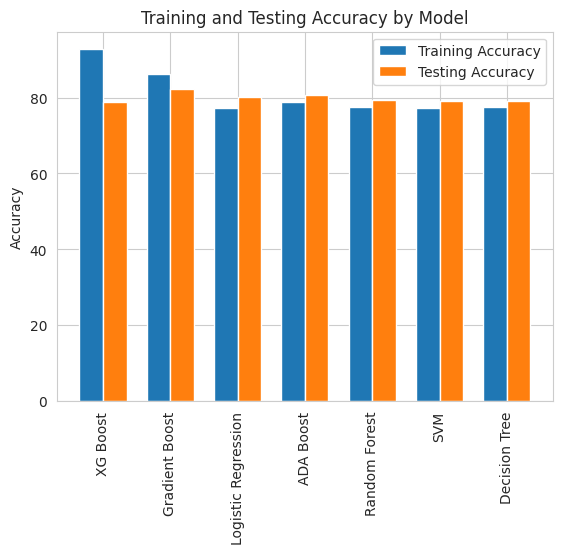

In [65]:
x = np.arange(len(mdf['Models']))
width = 0.35
plt.bar(x - width/2, mdf['Training Accuracy'], width, label='Training Accuracy')
plt.bar(x + width/2, mdf['Testing Accuracy'], width, label='Testing Accuracy')
plt.xticks(x, mdf['Models'], rotation=90)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy by Model')
plt.legend(loc='best')
plt.show()

<Axes: xlabel='attended'>

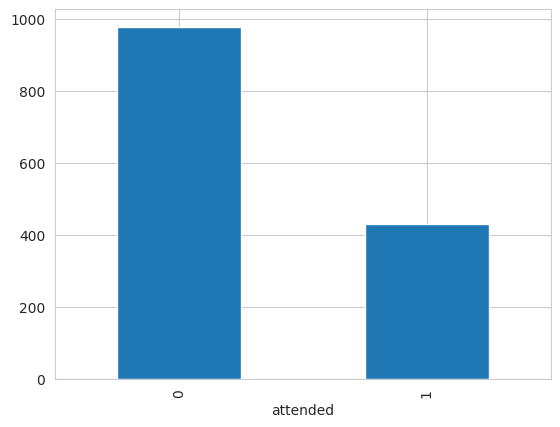

In [66]:
dfc1["attended"].value_counts().plot.bar()

##Summary
Based on the analysis of the provided data, HIIT, PM, Weight range 60-70, and Day of the Week 4 have the highest attendance rates.

ADA BOOST have Accuracy difference is 1.98, indicating good generalization with minimal overfitting.